# Begin

In [1]:
pip install langchain langchain-community langchain-tavily langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 7.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U duckduckgo-search

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -qU langchain-chroma

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 6.32.0 which is incompatible.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 6.32.0 which is incompatible.
pandas-gbq 0.29.1 requires google-api-core<3.0.0,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.
google-cloud-storage 2.19.0 requires google-api-core<3.0.0dev,>=2.15.0, but you have google-

In [6]:
pip install -U langchain-google-genai

  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.32.0
    Uninstalling protobuf-6.32.0:
      Successfully uninstalled protobuf-6.32.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.36.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
pandas-gbq 0.29.1 requires google-api-core<3.0.0,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6

In [7]:
pip install -qU "langchain[google-genai]"

Note: you may need to restart the kernel to use updated packages.


In [8]:
import getpass
import os

os.environ["TAVILY_API_KEY"] = getpass.getpass()

 ········


In [10]:
from langchain_tavily import TavilySearch
from langchain_community.tools import DuckDuckGoSearchRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

from langchain_tavily import TavilySearch

Tavily= TavilySearch(
    max_results=5,
    include_answer=True,       # returns Tavily's generated answer
    include_raw_content=False,  # returns cleaned/raw HTML as text
)

DuckDuckGo= DuckDuckGoSearchRun()
Wiki= WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

search_tools= [Tavily, DuckDuckGo, Wiki]

In [11]:
def search_call(query, search_tools):
    res= []
    
    for search_agent in search_tools:
        try:
            result= search_agent.invoke(query)
            if result:
                if isinstance(search_agent, TavilySearch):
                    
                    for item in result.get("results", []):
                        if "content" in item:
                            res.append(item["content"])
                else:
                    res.append(result)
        except Exception as e:
            print(f"{search_agent} failed: {e}")
    
    return "\n\n".join(res) if res else "No relevant info found."

query= input("What is your query : ")
see= search_call("name", search_tools)
print(see)

What is your query :  IIT Kanpur


/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


See also: Appendix:Variations of "name". For Wiktionary's list of names, see Appendix:Names. Contents. 1 English. 1.1 Etymology 1.

*   8 Named entities Main article: List of biblical names Named entities _Named Entities for Computational Linguistics_. "Ethnics as Personal Names". *   Behind The Name, The etymology of first names | * v * t * e Personal names and anthroponymy | | Related | * Acronym * Anonymity * Anthropomorphism * personification * national * Call sign * Deadnaming * Endonym and exonym * Family * Galton–Watson process * Legal name * name change * Namesake * Naming taboo * Nomenclature * _nomen nescio_ * Misnomer * Onomastics * _-onym_ * Personal identity * identifier * Proper noun * Signature * monogram * royal cypher * _khelrtva_ * _signum manus_ * _tughra_ * Surnames by country | *   Names

noun  verb  ## noun ## verb transitive verb Noun Verb ## Examples of name in a Sentence ## Word History Noun and Verb Middle English, from Old English nama; akin to Old High Germa

# Web scraper + RAG Agent

In [12]:
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings= GoogleGenerativeAIEmbeddings(model="models/embedding-001")

Enter API key for Google Gemini:  ········


In [13]:
from langchain_chroma import Chroma

try:
    vector_store= Chroma(
        collection_name= "example_collection",
        embedding_function= embeddings
    )
except Exception as e:
    print(f"Error setting up ChromaDB: {str(e)}")

/usr/local/lib/python3.11/dist-packages/google/colab/_import_hooks/_bokeh.py:16: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp  # pylint: disable=deprecated-module


In [14]:
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain.chat_models import init_chat_model

llm= init_chat_model("gemini-2.0-flash", model_provider= "google_genai", temperature= 0)

In [69]:
from langgraph.graph import StateGraph, START, END
from langchain.schema import Document
from typing import TypedDict, Annotated, Sequence, List
from langchain_core.messages import BaseMessage, SystemMessage, HumanMessage, ToolMessage
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_core.tools import tool

In [70]:
class AgentState(TypedDict):
    question : str
    content : str
    context : List[Document]
    answer : str

In [91]:
from langchain.prompts import PromptTemplate

# Define custom prompt template as a string
template= """
 You are a knowledgeable and helpful AI assistant. 
 You are provided with some retrieved context and a user question. 
 Your job is to use the context as much as possible to answer accurately. 
 If the context does not have enough information, say so honestly instead of guessing. 
 Always explain clearly and step by step when possible.

Context:
{context}

Question:
{question}

Answer:
"""

# Create a PromptTemplate object
prompt= PromptTemplate(
    input_variables= ["context", "question"],
    template= template,
)

In [31]:
def retriever_tool(query: str) ->str:
    """
    This tool searches the relevent information to the query from the given data
    """
    
    docs= retriever.invoke(query)
    if not docs:
        return "I found no relevent information form the data"
    result= []
    
    for i, docs in enumerate(docs):
        results.append(f"Document {i+1}: \n {doc.page_content}")

    return "\n\n".join(results)

In [71]:
def splitter(state : AgentState) -> AgentState:
    text_splitter= RecursiveCharacterTextSplitter(
        chunk_size= 1000,
        chunk_overlap=200
    )

    docs= [Document(page_content=state["content"], metadata={"source": "search"})]
    chunks= text_splitter.split_documents(docs)
    return chunks

retriever= vector_store.as_retriever(
    search_type= "similarity",
    search_kwags={"k":5}
)

In [92]:
def query_handler(state : AgentState) -> AgentState:
    """This Node takes user query and then generates search results from the search agent"""
    state["content"]= search_call(state["question"], search_tools)
    return state

def embed_retrieve(state : AgentState) -> AgentState:
    """This node retrieves relevent chunks for providing context to the llm."""
    
    chunks= splitter(state)
    vector_store= InMemoryVectorStore(embeddings)
    _=vector_store.add_documents(documents= chunks)
    
    query= state["question"]
    retrieved_docs= vector_store.similarity_search(
        query, k=5
    )

    state["context"]= retrieved_docs
    return state

def generate(state : AgentState) -> AgentState:
    docs_content= "\n\n".join(doc.page_content for doc in state["context"])
    messages= prompt.format(context= docs_content, question= state["question"])
    state["answer"]= llm.invoke(messages)
    return state

graph= StateGraph(AgentState)
graph.add_node("query_handler", query_handler)
graph.add_node("embed_retrieve", embed_retrieve)
graph.add_node("generate", generate)

graph.set_entry_point("query_handler")
graph.add_edge("query_handler", "embed_retrieve")
graph.add_edge("embed_retrieve", "generate")
graph.set_finish_point("generate")
app= graph.compile()

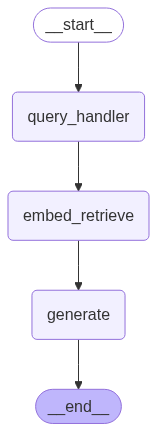

In [93]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [94]:
response= app.invoke({"question": "What is black hole  Explain points"})
print(response["answer"].content)

/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


A black hole is a region in space with extreme gravity, so strong that not even light can escape from it.

Here are some key aspects of black holes, based on the provided context:

*   **Extreme Gravity:** Black holes have gravity so intense that nothing, not even light, can escape. This makes them exceptionally difficult to see.
*   **Singularity:** Black holes contain a central singularity.
*   **Event Horizon:** Black holes have an event horizon.
*   **Formation:** Black holes can form through gravitational collapse.
*   **Location:** Supermassive black holes (SMBHs) are theoretically predicted to be at the center of every galaxy and may be essential for their formation.
